# EDA-Project 2

Это ваш второй проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"houses_to_rent.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


### Вопросы
1. Какая площадь объектов (квартир, домов) больше всего пользуется спросом (распределение по площади)? 
2. Как выглядит распределение стоимости арендной платы?
3. Есть ли разница по разным показателям между объектами (квартирами, домами) расположенных внутри города и вне города?
4. Какая взаимосвязь между общей ценой и площадью объектов?
5. Средняя цена и средняя площадь объектов в зависимости от местоположения (внутри/вне города)?
6. Средняя цена объектов в зависимости от количества комнат?
7. Какое соотношение количества объектов в зависимости от местоположения (внутри/вне города)?

### Считывание, очистка и обработка данных

In [1]:
import pandas as pd
import functions as fn
import os

In [2]:
files_csv = [file for file in os.listdir() if file.endswith('csv')]
print(files_csv)

['houses_to_rent.csv']


In [3]:
rent = pd.read_csv('houses_to_rent.csv', index_col=[0])
print(rent.shape)
rent.head()

(6080, 13)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


In [5]:
rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [6]:
rent = fn.clean(rent)
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   floor           6080 non-null   int32
 6   animal          6080 non-null   int32
 7   furniture       6080 non-null   int32
 8   hoa             6080 non-null   int32
 9   rent amount     6080 non-null   int32
 10  property tax    6080 non-null   int32
 11  fire insurance  6080 non-null   int32
 12  total           6080 non-null   int32
dtypes: int32(8), int64(5)
memory usage: 475.0 KB


In [7]:
rent.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257


### Ответ на 1 вопрос
Какая площадь объектов (квартир, домов) больше всего пользуется спросом (распределение по площади)?

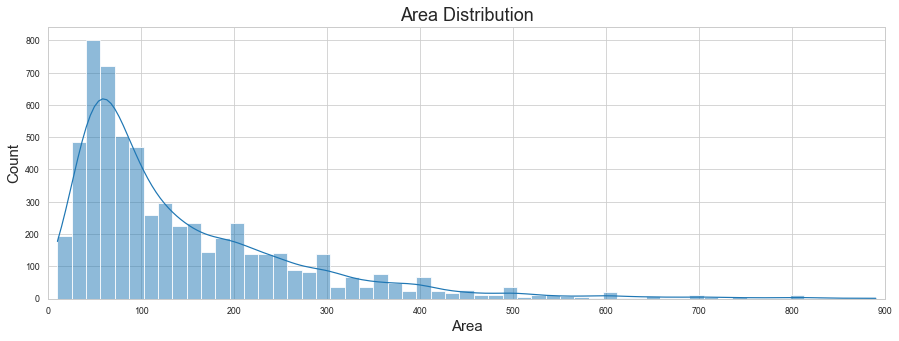

In [8]:
fn.hist(rent,'area')

По графику мы можем наблюдать, что больше всего квартир сдаются с маленькой квадратурой - с площадью до 100 кв.м.

### Ответ на 2 вопрос
Как выглядит распределение стоимости арендной платы?

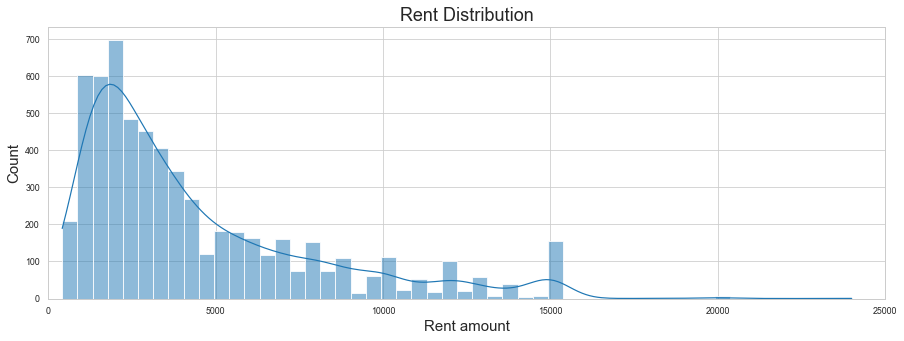

In [9]:
fn.hist(rent,'rent amount')

Распределение стоимости арендной платы в основном сосредоточены на показателе до 5000 долларов, реже встречаются те, кто готов арендавать квартиру/дом больше чем за 5000 долларов

### Ответ на 3 вопрос
Есть ли разница по разным показателям между объектами (квартирами, домами) расположенных внутри города и вне города?

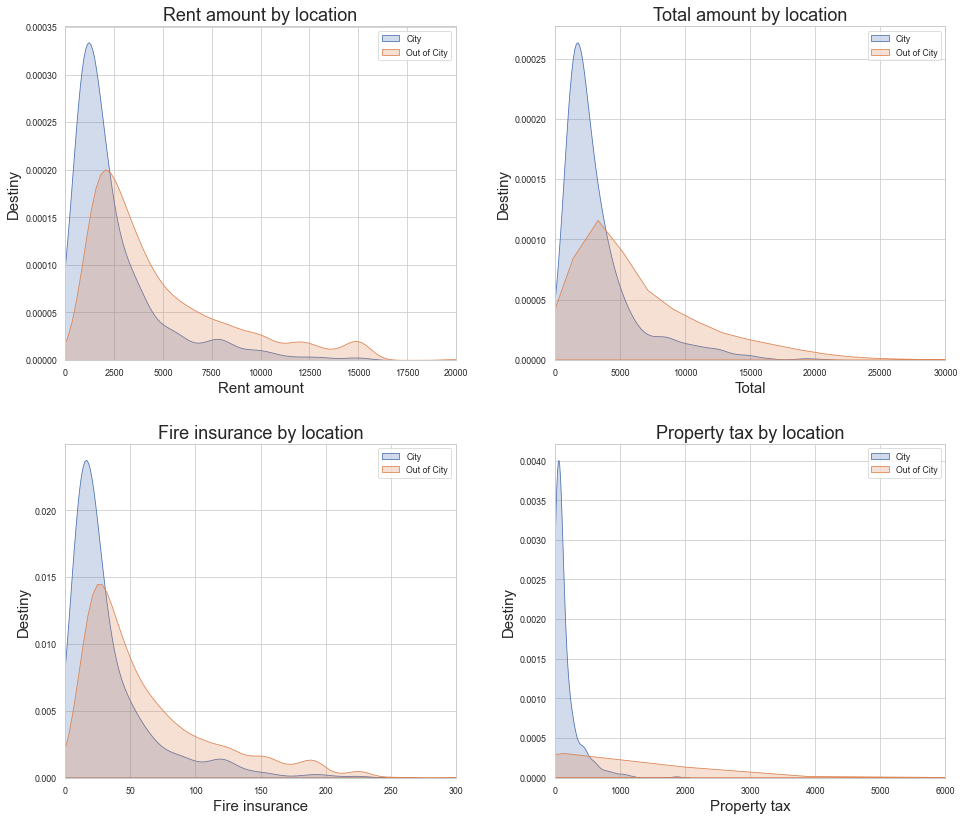

In [10]:
fn.kde(rent)

По графику kdeplot можно наблюдать, что у объектов находящихся вне города стоимость аренды, общая стоимость, страховка от пожара, налог на имущество идет выше чем у объектов находящихся внутри города, также можно заметить, что основная доля арендуемых квартир находится внутри города

### Ответ на 4 вопрос
Какая взаимосвязь между общей ценой и площадью объектов?

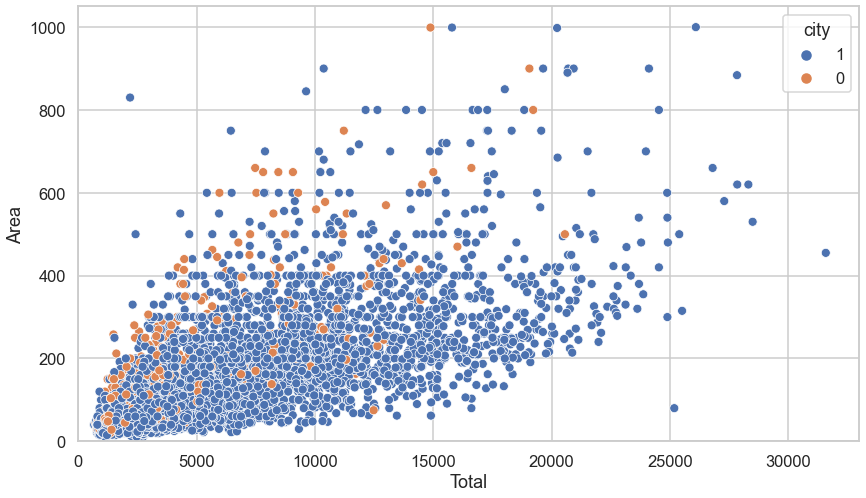

In [11]:
fn.scatter(rent)

На графике scatterplot можно заметить, что площадь объектов влияет на общую стоимость: чем больше квадратура квартир/домов, тем выше цена

### Ответ на 5 вопрос
Средняя цена и средняя площадь объектов в зависимости от местоположения (внутри/вне города)?

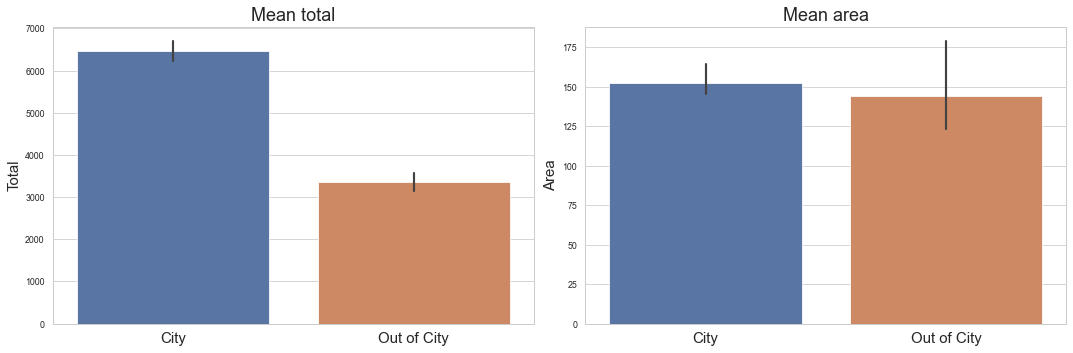

In [12]:
fn.bar(rent)

- Средняя цена за квартиры и дома находящихся внутри города равна 6500 долларов, вне города - 3300 долларов
- Средняя пощадь всех арендуемых объектов внутри города - 150 кв.м., вне города - 143 кв.м.

### Ответ на 6 вопрос
Средняя цена объектов в зависимости от количества комнат?

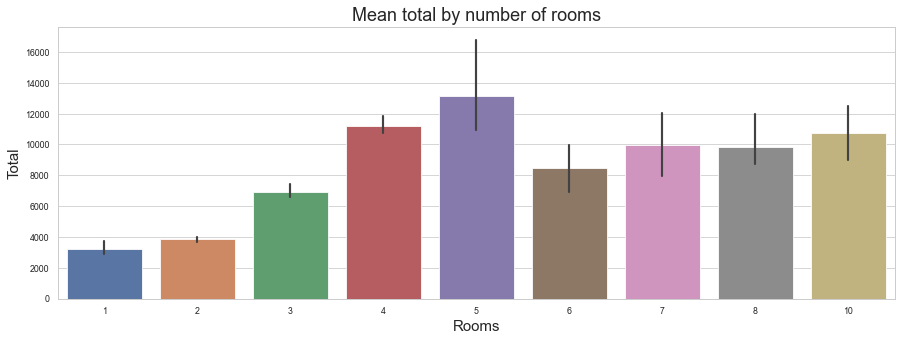

In [13]:
fn.bar2(rent)

На графике barplot можно заметить тенденцию роста средней цены за квартиры и дома в зависимости от количества комнат, самые дорогие - 5-комнатные квартиры/дома, далее начиная с 6-комнатных цена падает, так как спрос на такие большие квартиры/дома не большой

### Ответ на 7 вопрос
Какое соотношение количества объектов в зависимости от местоположения (внутри/вне города)?

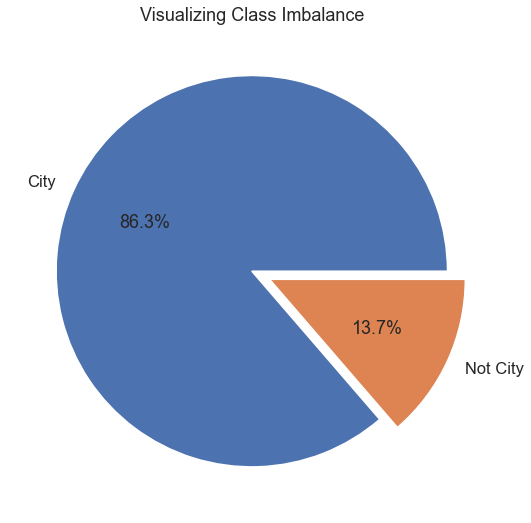

In [14]:
fn.pie(rent)

Основная доля арендуемых квартир и домов находится внутри города 